## Assignment 4

This assignment asks you to use resources at hand to apply module 6 - Linear Regression to several sets of data.

## Learning Outcomes

- Exploratory analysis for regression
- Understand difference between linear and non-linear models
- Carry out OLS regression model
- Evaluate model


**Question 1**

* For each data set in Assignment4_linear_regression_data.xlsx:

- Create a scatter plot and visually decide if a linear model is appropriate (a matrix scatter plot will would be most efficient).

* If the relation is not linear, transform the data accordingly. 
 - Try logarithm, exponential, square root, square, etc., for Y and/or X until you see a linear relation.  You only need to report what is the transformation chosen, not all the attempts. 
 Note:  most of the time, you can guess visually. A systematic way is to create a matrix scatter plot of the different transformations.  A generic way we did not cover is to use a Box-Cox transformation. 
 
* Create an OLS model for the original and transformed data if required. 
 - Evaluate if the OLS assumptions are met: normality of errors centered around zero, equal variance, etc..., for the original data and transformed data if appropriate. 

 - Comment how the transformation impacted the different assumptions. (This should be done only by looking at the output diagnostic charts created by the software)
 - If datasets have outliers, remove the outliers and see the effect in the model (slope, intercept and R-square)


The output of the assignment should be: 

- OLS full report for the original and transformed data if appropriate (only two datasets should need transformation).

- A short comment on the validity of the linear assumptions for the original and transformed data set when appropriate (it should not need to be longer than a couple of sentences).

- An interpretation of the slope and intercept in relation to the original data, i.e. if the model is linear [intercept value] is the expected value when the independent variable is zero, etc.).  If the model is not linear, you need to transform the equation back to its original form.  

Check out the following if you need further guidance:
http://www.bzst.com/2009/09/interpreting-log-transformed-variables.html

https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqhow-do-i-interpret-a-regression-model-when-some-variables-are-log-transformed/

https://stats.idre.ucla.edu/sas/faq/how-can-i-interpret-log-transformed-variables-in-terms-of-percent-change-in-linear-regression/

https://stats.stackexchange.com/questions/266722/interpretation-of-linear-regression-results-where-dependent-variable-is-transfor

- If the dataset have outliers, determine if the outlier have leverage or not by comparing the OLS with and without the outlier.


In [342]:
import pandas as pd

# Import the data set
df1 = pd.read_excel("Assignment4_linear_regresion_data.xlsx", sheet_name="Set 1")
df2 = pd.read_excel("Assignment4_linear_regresion_data.xlsx", sheet_name="Set 2")
df3 = pd.read_excel("Assignment4_linear_regresion_data.xlsx", sheet_name="Set 3")
df4 = pd.read_excel("Assignment4_linear_regresion_data.xlsx", sheet_name="Set 4")
df5 = pd.read_excel("Assignment4_linear_regresion_data.xlsx", sheet_name="Set 5")
df6 = pd.read_excel("Assignment4_linear_regresion_data.xlsx", sheet_name="Set 6")


<AxesSubplot:xlabel='x', ylabel='y'>

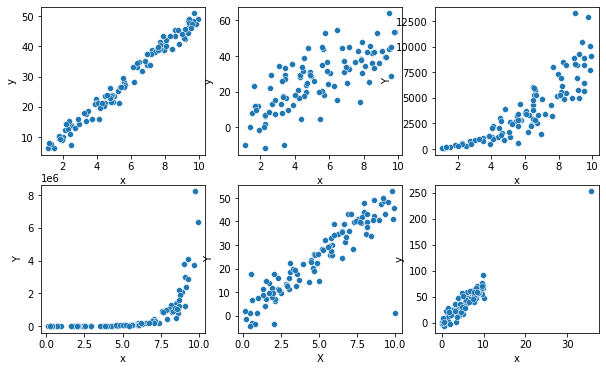

In [343]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a matrix scatter plot and visually decide if a linear model is appropriate

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

sns.scatterplot(x='x', y='y', data=df1, ax=axes[0, 0])
sns.scatterplot(x='x', y='y', data=df2, ax=axes[0, 1])
sns.scatterplot(x='x', y='Y', data=df3, ax=axes[0, 2])
sns.scatterplot(x='x', y='Y', data=df4, ax=axes[1, 0])
sns.scatterplot(x='X', y='Y', data=df5, ax=axes[1, 1])
sns.scatterplot(x='x', y='y', data=df6, ax=axes[1, 2])

From the scatterplots, it was visually decided that the top-left, bottom-middle, and bottom-right graphs would be appropriate for a linear model.


In [344]:
# Transform the data until it appears to be a linear relation
# Use the box-cox method & yeo-johnson

import scipy

lmbda_2 = scipy.stats.yeojohnson(df2['y'])
print('plot 2 with lambda of', lmbda_2[1], 'appears to be a linear model.')

lmbda_3 = scipy.stats.boxcox(df3['Y'])
print(lmbda_3[1])

lmbda_4 = scipy.stats.boxcox(df4['Y'])
print(lmbda_4[1])

plot 2 with lambda of 1.034956214032946 appears to be a linear model.
0.3963404407119001
0.04196708711302993


In [345]:
df3['Y'] = df3['Y'].apply(lambda Y: Y**lmbda_3[1]-1/lmbda_3[1])
df4['Y'] = df4['Y'].apply(lambda Y: Y**lmbda_4[1]-1/lmbda_4[1])


<AxesSubplot:xlabel='x', ylabel='y'>

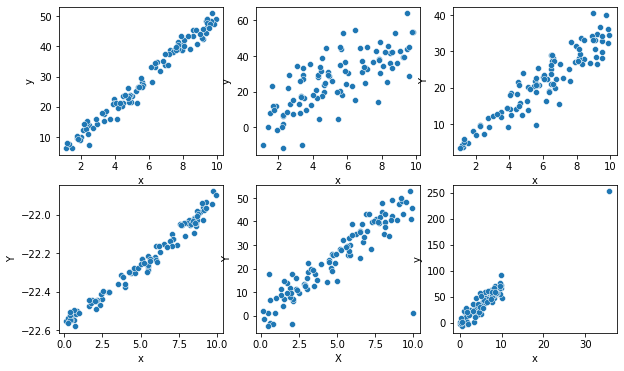

In [346]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

sns.scatterplot(x='x', y='y', data=df1, ax=axes[0, 0])
sns.scatterplot(x='x', y='y', data=df2, ax=axes[0, 1])
sns.scatterplot(x='x', y='Y', data=df3, ax=axes[0, 2])
sns.scatterplot(x='x', y='Y', data=df4, ax=axes[1, 0])
sns.scatterplot(x='X', y='Y', data=df5, ax=axes[1, 1])
sns.scatterplot(x='x', y='y', data=df6, ax=axes[1, 2])

The transformation chosen for 2, 3, and 4 are linear, power of 0.4 and power of 0.4 respectively

In [347]:
# Evaluate if the OLS assumptions are met: 
# 1. normality of errors centered around zero
# 2. equal variance
# 4. for the original data and transformed data if appropriate.

import statsmodels.api as sm
import numpy as np
import statsmodels.formula.api as smf

# Calculate the correlation
#Data set 1
cm1 = df1.corr(method = 'pearson')
print(cm1)

#Data set 2
cm2 = df2.corr(method = 'pearson')
print(cm2)

#Data set 3
cm3 = df3.corr(method = 'pearson')
print(cm3)

#Data set 4
cm4 = df4.corr(method = 'pearson')
print(cm4)

#Data set 5
cm5 = df5.corr(method = 'pearson')
print(cm5)

#Data set 6
cm6 = df6.corr(method = 'pearson')
print(cm6)

          y         x
y  1.000000  0.989468
x  0.989468  1.000000
          y         x
y  1.000000  0.745168
x  0.745168  1.000000
         Y        x
Y  1.00000  0.93141
x  0.93141  1.00000
          Y         x
Y  1.000000  0.989315
x  0.989315  1.000000
          Y         X
Y  1.000000  0.897892
X  0.897892  1.000000
          y         x
y  1.000000  0.955578
x  0.955578  1.000000


In [348]:
# Calculate the mean
#Data set 1
mu1_x = np.mean(df1['x'])
mu1_y = np.mean(df1['y'])

#Data set 2
mu2_x = np.mean(df2['x'])
mu2_y = np.mean(df2['y'])

#Data set 3
mu3_x = np.mean(df3['x'])
mu3_y = np.mean(df3['Y'])

#Data set 4
mu4_x = np.mean(df4['x'])
mu4_y = np.mean(df4['Y'])

#Data set 5
mu5_x = np.mean(df5['X'])
mu5_y = np.mean(df5['Y'])

#Data set 6
mu6_x = np.mean(df6['x'])
mu6_y = np.mean(df6['y'])


print(mu1_x, mu1_y)
print(mu2_x, mu2_y)
print(mu3_x, mu3_y)
print(mu4_x, mu4_y)
print(mu5_x, mu5_y)
print(mu6_x, mu6_y)

5.809318189398433 29.193214088275504
5.375184037349295 26.774707353588543
5.999130000000001 21.492927794302776
5.227871000000001 -22.240036912887117
4.975682277227723 24.640736209557026
5.618742574257427 39.17820780213763


In [349]:
# Calculate the Standard Deviation

#Data Set 1
sig1_x = np.std(df1['x'], ddof=1)
sig1_y = np.std(df1['y'], ddof=1)

#Data Set 2
sig2_x = np.std(df2['x'], ddof=1)
sig2_y = np.std(df2['y'], ddof=1)

#Data Set 3
sig3_x = np.std(df3['x'], ddof=1)
sig3_y = np.std(df3['Y'], ddof=1)

#Data Set 4
sig4_x = np.std(df4['x'], ddof=1)
sig4_y = np.std(df4['Y'], ddof=1)

#Data Set 5
sig5_x = np.std(df5['X'], ddof=1)
sig5_y = np.std(df5['Y'], ddof=1)

#Data Set 6
sig6_x = np.std(df6['x'], ddof=1)
sig6_y = np.std(df6['y'], ddof=1)

print(sig1_x, sig1_y)
print(sig2_x, sig2_y)
print(sig3_x, sig3_y)
print(sig4_x, sig4_y)
print(sig5_x, sig5_y)
print(sig6_x, sig6_y)

2.6177123843290535 13.186232166883334
2.4364560000707685 15.620389615388762
2.44405810762231 9.071885081582781
2.9860725563821755 0.1959843016060688
2.852301356708958 15.143420359947635
4.268606722534803 31.39086404094349


In [350]:
# Calculate beta_0 and beta_1

#Data set 1
beta1_1 = sig1_y/sig1_x * cm1.loc['x', 'y']
beta1_0 = mu1_y - beta1_1 * mu1_x

#Data set 2
beta2_1 = sig2_y/sig2_x * cm2.loc['x', 'y']
beta2_0 = mu2_y - beta2_1 * mu2_x

#Data set 3
beta3_1 = sig3_y/sig3_x * cm3.loc['x', 'Y']
beta3_0 = mu3_y - beta3_1 * mu3_x

#Data set 4
beta4_1 = sig4_y/sig4_x * cm4.loc['x', 'Y']
beta4_0 = mu4_y - beta4_1 * mu4_x

#Data set 5
beta5_1 = sig5_y/sig5_x * cm5.loc['X', 'Y']
beta5_0 = mu5_y - beta5_1 * mu5_x

#Data set 6
beta6_1 = sig6_y/sig6_x * cm6.loc['x', 'y']
beta6_0 = mu6_y - beta6_1 * mu6_x

print(beta1_0, beta1_1)
print(beta2_0, beta2_1)
print(beta3_0, beta3_1)
print(beta4_0, beta4_1)
print(beta5_0, beta5_1)
print(beta6_0, beta6_1)

0.23807024664960608 4.984258547666893
1.0955520655451245 4.777353688657472
0.7526139597202111 3.4572202693694853
-22.579490367283274 0.06493149016036481
0.9212565388609768 4.767080844219763
-0.3059107436463293 7.027216147378344


In [351]:
# Initialize the regression model
m1 = smf.ols('y ~ x', data = df1)
m2 = smf.ols('y ~ x', data = df2)
m3 = smf.ols('Y ~ x', data = df3)
m4 = smf.ols('Y ~ x', data = df4)
m5 = smf.ols('Y ~ X', data = df5)
m6 = smf.ols('y ~ x', data = df6)

# Fit the regression model
m1 = m1.fit()
m2 = m2.fit()
m3 = m3.fit()
m4 = m4.fit()
m5 = m5.fit()
m6 = m6.fit()

# Initial Intercept, slope, R^2 Values (To be compared to below)
print("Set1",m1.summary(),'\n')
print("Set2",m2.summary(),'\n')
print("Set3",m3.summary(),'\n')
print("Set4",m4.summary(),'\n')
print("Set5",m5.summary(),'\n')
print("Set6",m6.summary(),'\n')

Set1                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     4579.
Date:                Thu, 30 Mar 2023   Prob (F-statistic):           4.47e-84
Time:                        21:48:41   Log-Likelihood:                -206.03
No. Observations:                 100   AIC:                             416.1
Df Residuals:                      98   BIC:                             421.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2381      0.469      0.508    

In [352]:
# Calculate estimates of y

#Data Set 1
intercept, slope = m1.params
df1['y_est'] = intercept + slope * df1.x

#Data Set 2
intercept, slope = m2.params
df2['y_est'] = intercept + slope * df2.x

#Data Set 3
intercept, slope = m3.params
df3['y_est'] = intercept + slope * df3.x

#Data Set 4
intercept, slope = m4.params
df4['y_est'] = intercept + slope * df4.x

#Data Set 5
intercept, slope = m5.params
df5['y_est'] = intercept + slope * df5.X

#Data Set 6
intercept, slope = m6.params
df6['y_est'] = intercept + slope * df6.x

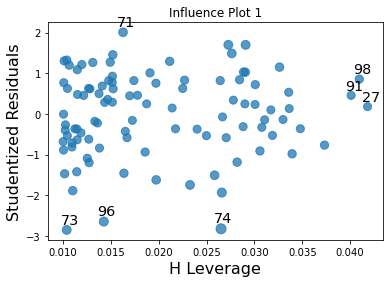

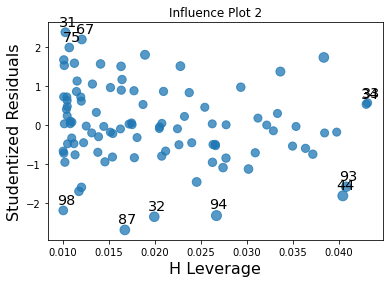

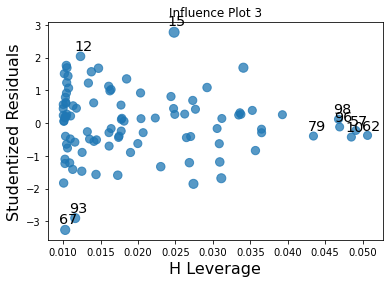

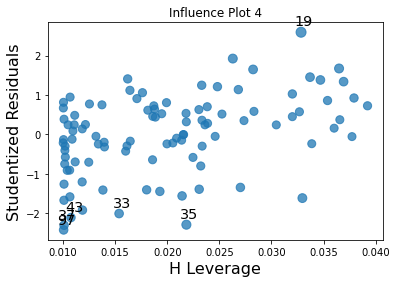

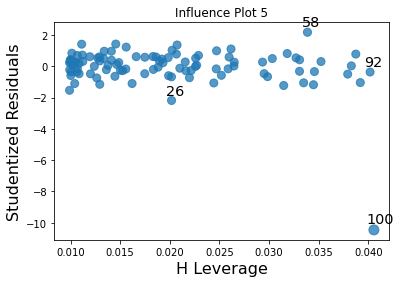

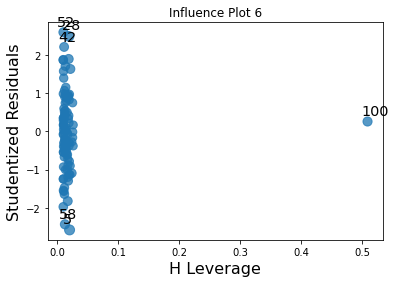

In [353]:
# Check for outliers

sm.graphics.influence_plot(m1, size=10)
plt.title('Influence Plot 1')
sm.graphics.influence_plot(m2, size=10)
plt.title('Influence Plot 2')
sm.graphics.influence_plot(m3, size=10)
plt.title('Influence Plot 3')
sm.graphics.influence_plot(m4, size=10)
plt.title('Influence Plot 4')
sm.graphics.influence_plot(m5, size=10)
plt.title('Influence Plot 5')
sm.graphics.influence_plot(m6, size=10)
plt.title('Influence Plot 6')
plt.show()

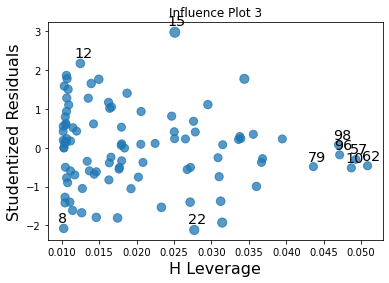

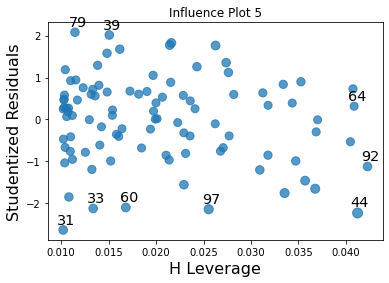

In [354]:
# Check for outliers

# Remove points with studentized residuals < -3 or > 3
# From visual inspection, plot 3 and 5 have such outliers

#Through iternation, the following points were < -3 or > 3 of the studentized residuals
df3 = df3.drop(df3.index[[67,93]])

df5 = df5.drop(df5.index[[100,26,58]])

#Data set 3
cm3 = df3.corr(method = 'pearson')

mu3_x = np.mean(df3['x'])
mu3_y = np.mean(df3['Y'])

sig3_x = np.std(df3['x'], ddof=1)
sig3_y = np.std(df3['Y'], ddof=1)

beta3_1 = sig3_y/sig3_x * cm3.loc['x', 'Y']
beta3_0 = mu3_y - beta3_1 * mu3_x

m3 = smf.ols('Y ~ x', data = df3)
m3 = m3.fit()

intercept, slope = m3.params
df3['y_est'] = intercept + slope * df3.x

sm.graphics.influence_plot(m3, size=10)
plt.title('Influence Plot 3')


#Data set 5
cm5 = df5.corr(method = 'pearson')

mu5_x = np.mean(df5['X'])
mu5_y = np.mean(df5['Y'])

sig5_x = np.std(df5['X'], ddof=1)
sig5_y = np.std(df5['Y'], ddof=1)

beta5_1 = sig5_y/sig5_x * cm5.loc['X', 'Y']
beta5_0 = mu5_y - beta5_1 * mu5_x

m5 = smf.ols('Y ~ X', data = df5)
m5 = m5.fit()

intercept, slope = m5.params
df5['y_est'] = intercept + slope * df5.X

sm.graphics.influence_plot(m5, size=10)
plt.title('Influence Plot 5')

plt.show()

In [355]:
# Remove points with high H leverage >3*p/n

p = 2
n1 = len(df1)
n2 = len(df2)
n3 = len(df3)
n4 = len(df4)
n5 = len(df5)
n6 = len(df6)

h1 = 3*p/n1
h2 = 3*p/n2
h3 = 3*p/n3
h4 = 3*p/n4
h5 = 3*p/n5
h6 = 3*p/n6

influence = m1.get_influence()
leverage1 = influence.hat_matrix_diag
influence = m2.get_influence()
leverage2 = influence.hat_matrix_diag
influence = m3.get_influence()
leverage3 = influence.hat_matrix_diag
influence = m4.get_influence()
leverage4 = influence.hat_matrix_diag
influence = m5.get_influence()
leverage5 = influence.hat_matrix_diag
influence = m6.get_influence()
leverage6 = influence.hat_matrix_diag


for i in range(n1):
    if leverage1[i] > h1:
           print(i,'set1')
for i in range(n2):
    if leverage2[i] > h2:
           print(i,'set2')  
for i in range(n3):
    if leverage3[i] > h3:
           print(i,'set3')
for i in range(n4):
    if leverage4[i] > h4:
           print(i,'set4') 
for i in range(n5):
    if leverage5[i] > h5:
           print(i,'set5')
for i in range(n6):
    if leverage6[i] > h6:
           print(i,'set6') 

# Set 6 has 1 value above the H Leverage requirement. Remove indexed value 100

df6 = df6.drop(df6.index[[100]])

100 set6


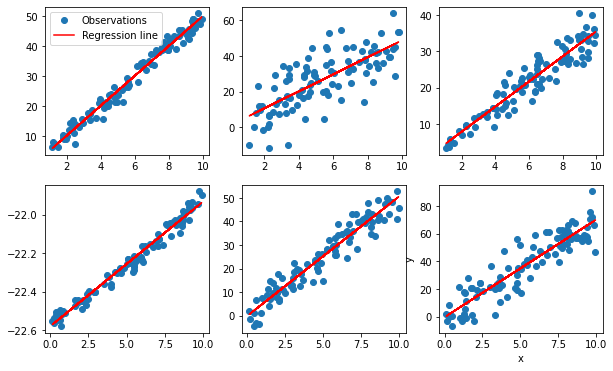

In [356]:
# Plot the regression line

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

# Data Set 1
axes[0,0].plot(df1.x, df1.y, 'o', label = 'Observations')
plt.xlabel('x')
plt.ylabel('y')
# Plot regression line
axes[0,0].plot(df1.x, df1.y_est, 'r-', label='Regression line')

# Add legend
axes[0,0].legend()

# Data Set 2
axes[0,1].plot(df2.x, df2.y, 'o', label = 'Observations')
plt.xlabel('x')
plt.ylabel('y')
# Plot regression line
axes[0,1].plot(df2.x, df2.y_est, 'r-', label='Regression line')

# Data Set 3
axes[0,2].plot(df3.x, df3.Y, 'o', label = 'Observations')
plt.xlabel('x')
plt.ylabel('y')
# Plot regression line
axes[0,2].plot(df3.x, df3.y_est, 'r-', label='Regression line')

# Data Set 4
axes[1,0].plot(df4.x, df4.Y, 'o', label = 'Observations')
plt.xlabel('x')
plt.ylabel('y')
# Plot regression line
axes[1,0].plot(df4.x, df4.y_est, 'r-', label='Regression line')

# Data Set 5
axes[1,1].plot(df5.X, df5.Y, 'o', label = 'Observations')
plt.xlabel('x')
plt.ylabel('y')
# Plot regression line
axes[1,1].plot(df5.X, df5.y_est, 'r-', label='Regression line')

# Data Set 6
axes[1,2].plot(df6.x, df6.y, 'o', label = 'Observations')
plt.xlabel('x')
plt.ylabel('y')
# Plot regression line
axes[1,2].plot(df6.x, df6.y_est, 'r-', label='Regression line')

plt.show()

 - Evaluate if the OLS assumptions are met:  equal variance

In [357]:
# Check OLS Assumptions

# Normality of errors. Check if the mean is close to 0.

influence = m3.get_influence()
leverage3 = influence.hat_matrix_diag
print("Set3\n",pd.Series(leverage3).describe())

influence = m5.get_influence()
leverage5 = influence.hat_matrix_diag
print("Set5\n",pd.Series(leverage5).describe())

influence = m6.get_influence()
leverage6 = influence.hat_matrix_diag
print("Set6\n",pd.Series(leverage6).describe())

# The mean is close to 0 so therefore normality of errors is valid.

Set3
 count    98.000000
mean      0.020408
std       0.010846
min       0.010204
25%       0.010981
50%       0.016620
75%       0.027198
max       0.050853
dtype: float64
Set5
 count    98.000000
mean      0.020408
std       0.009173
min       0.010204
25%       0.012645
50%       0.018749
75%       0.026257
max       0.042284
dtype: float64
Set6
 count    101.000000
mean       0.019802
std        0.049396
min        0.009902
25%        0.011080
50%        0.013490
75%        0.018125
max        0.509273
dtype: float64


Text(0.5, 0.98, 'Residuals vs. Predicted Values')

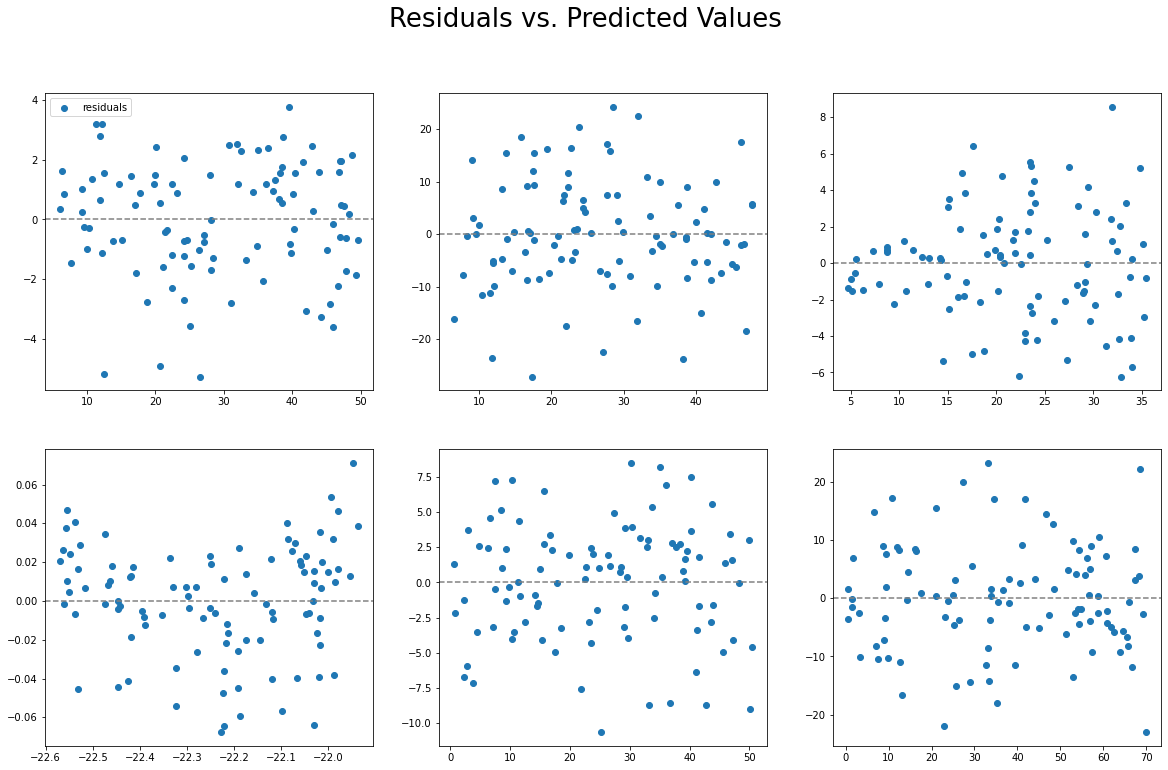

In [382]:
# Equal variance. Check the Residual vs. Predicted Values

residuals1 = df1['y'] - df1['y_est']
residuals2 = df2['y'] - df2['y_est']
residuals3 = df3['Y'] - df3['y_est']
residuals4 = df4['Y'] - df4['y_est']
residuals5 = df5['Y'] - df5['y_est']
residuals6 = df6['y'] - df6['y_est']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))


# Data Set 1
axes[0,0].scatter(df1['y_est'], residuals1, label='residuals')
axes[0,0].axhline(y=0, color='grey', linestyle='--')

# Data Set 2
axes[0,1].scatter(df2['y_est'], residuals2, label='residuals')
axes[0,1].axhline(y=0, color='grey', linestyle='--')

# Data Set 3
axes[0,2].scatter(df3['y_est'], residuals3, label='residuals')
axes[0,2].axhline(y=0, color='grey', linestyle='--')

# Data Set 4
axes[1,0].scatter(df4['y_est'], residuals4, label='residuals')
axes[1,0].axhline(y=0, color='grey', linestyle='--')

# Data Set 5
axes[1,1].scatter(df5['y_est'], residuals5, label='residuals')
axes[1,1].axhline(y=0, color='grey', linestyle='--')

# Data Set 6
axes[1,2].scatter(df6['y_est'], residuals6, label='residuals')
axes[1,2].axhline(y=0, color='grey', linestyle='--')

# Add legend
axes[0,0].legend()
plt.suptitle('Residuals vs. Predicted Values', fontsize=26)

# Set 3 though appears to not be equal variant.
# Therefore the linear assumption is valid for most of the data sets as it mets OLS assumptions of normality of errors and equal variance. 

In [ ]:
#Intercept, slope, R^2 Values
print("Set3",m3.summary(),'\n')
print("Set5",m5.summary(),'\n')
print("Set6",m6.summary(),'\n')

# Changes in intercept, slope, and R^2 values can be seen comparing these results with those above.
